# Analyse des langues // partis politiques

Dans ce carnet est proposée une analyse des spécificités des genres, en relation avec le temps et la langue.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

In [2]:
### Librairies déjà installées avec Python
import pprint
import sqlite3 as sql

In [3]:
from fanalysis.ca import CA 
from fanalysis.mca import MCA

### Importer les données à analyser

In [4]:
### Se connecter à la base de données dans laquelle on va insérer
# le résultat de la requête SPARQL
cn = sql.connect('../../data/conseil_national_import.db')
cn

In [5]:
qr = """
SELECT wp.personne_uri, wp.nom_prenom,  wg.genre_code AS genre_code, wp2.parti_code AS parti_code, wp2.parti_uri AS parti_uri,
 max(wp.annee_naissance) AS annee_naissance,
   max(wl.code_langue) AS langue
FROM 
    wdt_personnes wp
JOIN 
    wdt_personnes_langues wpl ON wp.id = wpl.fk_personne_id
JOIN 
    wdt_langues wl ON wl.id = wpl.fk_langue_id
JOIN 
    wdt_personnes_partis wpp ON wp.id = wpp.fk_personne_id
JOIN 
    wdt_partis wp2 ON wp2.id = wpp.fk_parti_id
JOIN 
    wdt_genre wg ON wp.fk_genre_id = wg.id
GROUP BY wp.personne_uri, nom_prenom;

"""

In [6]:
### Vérifier que les données ont été importées correctement
cur = cn.cursor()
l = cur.execute(qr).fetchall()
print(len(l))
l[:3]

885


[('http://www.wikidata.org/entity/Q1029622',
  'Regula Rytz',
  'F',
  'Verts',
  'http://www.wikidata.org/entity/Q659739',
  1962,
  'ALL'),
 ('http://www.wikidata.org/entity/Q1039793',
  'Carl Miville-Seiler',
  'M',
  'PS',
  'http://www.wikidata.org/entity/Q303745',
  1921,
  'ALL'),
 ('http://www.wikidata.org/entity/Q105607582',
  'Fabienne Bugnon',
  'F',
  'Verts',
  'http://www.wikidata.org/entity/Q659739',
  1959,
  'FR')]

In [7]:
### Créer un DataFrame contenant les données
df_langue = pd.DataFrame(l, columns=['uri', 'nom', 'genre', 'parti', 'parti_uri','annee_nais', 
                     'langue'])
df_langue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885 entries, 0 to 884
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   uri         885 non-null    object
 1   nom         885 non-null    object
 2   genre       885 non-null    object
 3   parti       885 non-null    object
 4   parti_uri   885 non-null    object
 5   annee_nais  885 non-null    int64 
 6   langue      885 non-null    object
dtypes: int64(1), object(6)
memory usage: 48.5+ KB


## regroupement des partis par orientation

In [8]:

def orientation_code(o_uri):
    if o_uri == 'http://www.wikidata.org/entity/Q303745':
        # PS
        a = 'gauche'
    elif o_uri =='http://www.wikidata.org/entity/Q385258':
        # UDC
        a = 'extreme_droite'
    elif o_uri =='http://www.wikidata.org/entity/Q13850128':
        # PRD
        a = 'droite_liberale'
    elif o_uri =='http://www.wikidata.org/entity/Q659461':
        # PDC
        a = 'centre'
    elif o_uri =='http://www.wikidata.org/entity/Q659739':
        # Les Verts
        a = 'ecologiste'
    elif o_uri =='http://www.wikidata.org/entity/Q202638':
        # PLR
        a = 'droite_liberale'
    elif o_uri =='http://www.wikidata.org/entity/Q667785':
        # PLS
        a = 'droite_liberale'
    elif o_uri =='http://www.wikidata.org/entity/Q550295':
        # alliance des indépendants
        a = 'independant'
    elif o_uri =='http://www.wikidata.org/entity/Q545900':
        # PVL
        a = 'droite_liberale'
    elif o_uri =='http://www.wikidata.org/entity/Q100934025':
        # le centre
        a = 'centre'
    elif o_uri =='http://www.wikidata.org/entity/Q151768':
        # parti bourgeois démocrate
        a = 'centre'
    elif o_uri =='http://www.wikidata.org/entity/Q477228':
        # parti des paysans et artisans indépendants
        a = 'extreme_droite'
    elif o_uri =='http://www.wikidata.org/entity/Q667718':
        # parti évangélique suisse
        a = 'droite_conservatrice'
    elif o_uri =='http://www.wikidata.org/entity/Q661771':
        # parti suisse du travail
        a = 'extreme_gauche'
    elif o_uri =='http://www.wikidata.org/entity/Q660046':
        # démocrates suisse ou action nationale
        a = 'extreme_droite'
    elif o_uri =='http://www.wikidata.org/entity/Q668101':
        # ligue des Tessinois
        a = 'extreme_droite'
    elif o_uri =='http://www.wikidata.org/entity/Q2145393':
        # mouvement républicain
        a = 'droite_conservatrice'
    elif o_uri =='http://www.wikidata.org/entity/Q667836':
        # union démocratique fédérale
        a = 'droite_conservatrice'
    elif o_uri =='http://www.wikidata.org/entity/Q681843':
        # parti démocrate suisse
        a = 'extreme_droite'
    elif o_uri =='http://www.wikidata.org/entity/Q667725':
        # parti chrétien social
        a = 'centre'
    elif o_uri =='http://www.wikidata.org/entity/Q663580':
        # mouvement citoyens genevois
        a = 'extreme_droite'
    elif o_uri =='http://www.wikidata.org/entity/Q362949':
        # organisation progressistes de Suisse
        a = 'extreme_gauche'
    elif o_uri =='http://www.wikidata.org/entity/Q327591':
        # indépendant
        a = 'independant'
    elif o_uri =='http://www.wikidata.org/entity/Q13124':
        # parti libéral démocrate
        a = 'droite_liberale'
    elif o_uri =='http://www.wikidata.org/entity/Q684909':
        # collection fédérale Eidgenössische Sammlung
        a = 'extreme_droite'
    elif o_uri =='http://www.wikidata.org/entity/Q677491':
        # mouvement socio-libéral
        a = 'droite_conservatrice'
    elif o_uri =='http://www.wikidata.org/entity/Q672946':
        # parti suisse de la liberté
        a = 'extreme_droite'
    elif o_uri =='http://www.wikidata.org/entity/Q672926':
        # front national
        a = 'extreme_droite'
    elif o_uri =='http://www.wikidata.org/entity/Q3366732':
        # parti socialiste autonome
        a = 'gauche'
    elif o_uri =='http://www.wikidata.org/entity/Q3366188':
        # parti chrétien-social indépendant
        a = 'droite_conservatrice'
    elif o_uri =='http://www.wikidata.org/entity/Q286683':
        # solidaritéS
        a = 'extreme_gauche'
    elif o_uri =='http://www.wikidata.org/entity/Q255650':
        # la Gauche alternative linke
        a = 'gauche'
    elif o_uri =='http://www.wikidata.org/entity/Q20012603':
        # ensemble à gauche
        a = 'extreme_gauche'
    elif o_uri =='http://www.wikidata.org/entity/Q13142801':
        # Neue Front
        a = 'extreme_droite'
    elif o_uri =='http://www.wikidata.org/entity/Q1254507':
        # alliance verte et sociale bernoise, grünes bündnis
        a = 'ecologiste'
    elif o_uri =='http://www.wikidata.org/entity/Q1186111':
        # demokratisch-soziale partei
        a = 'centre'
    elif o_uri =='http://www.wikidata.org/entity/Q1084149':
        # parti chrétien-social d'obwald
        a = 'droite_conservatrice'
    elif o_uri =='http://www.wikidata.org/entity/Q10594788':
        # action nationale pour le peuple et la patrie
        a = 'extreme_droite'
    else :
        # orientation autre
        a = 'A'
    return a 


### On ajoute une nouvelle colonne et y on met pour chaque ligne le résultat de la fonction
df_langue['orientation_code'] = df_langue.apply(lambda x: orientation_code(x['parti_uri']), axis=1)

In [9]:
### Distribution des partis
df_langue.groupby(by='orientation_code').size().sort_values(ascending=False)

orientation_code
centre                  319
gauche                  209
extreme_droite          158
droite_liberale          82
ecologiste               64
independant              26
droite_conservatrice     19
extreme_gauche            8
dtype: int64

### Codage par périodes 

In [10]:
### On transforme le type de valeur de la colonne BirthYear
# de objet à entier
df_langue['annee_nais'] = df_langue['annee_nais'].astype(int)

In [11]:
### Créer une copie indépendante du DataFrame (attention aux copies de variables qui sont seulement des alias) 
cdf_p = df_langue[df_langue['annee_nais'] < 2020].copy(deep=True)
cdf_p.head(3)

,uri,nom,genre,parti,parti_uri,annee_nais,langue,orientation_code
0,http://www.wikidata.org/entity/Q1029622,Regula Rytz,F,Verts,http://www.wikidata.org/entity/Q659739,1962,ALL,ecologiste
1,http://www.wikidata.org/entity/Q1039793,Carl Miville-Seiler,M,PS,http://www.wikidata.org/entity/Q303745,1921,ALL,gauche
2,http://www.wikidata.org/entity/Q105607582,Fabienne Bugnon,F,Verts,http://www.wikidata.org/entity/Q659739,1959,FR,ecologiste


In [12]:
### Année minimale et maximale dans la population
min(cdf_p['annee_nais']), max(cdf_p['annee_nais'])

(1901, 1994)

In [13]:
## les périodes sont définies dans le github et se basent sur des changements majeurs du 20e siècle
l_per = [1901, 1915, 1930, 1946, 1976, 1997]

In [14]:
### fonction pd.cut : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html
# On ajoute une nouvelle colonne qui contient la période sur la base de la liste précédente
# et de la valeur de l'année

cdf_p['periodes'] = pd.cut(cdf_p['annee_nais'], l_per, right=False)

### Transformer le code ajouté pour qu'il soit plus lisible
# noter qu'on a arrondi les valeurs
cdf_p['periodes'] = cdf_p['periodes'].apply(lambda x : str(int(x.left))+'-'+ str(int(x.right)-1))

# Inspection
cdf_p.head(3)

,uri,nom,genre,parti,parti_uri,annee_nais,langue,orientation_code,periodes
0,http://www.wikidata.org/entity/Q1029622,Regula Rytz,F,Verts,http://www.wikidata.org/entity/Q659739,1962,ALL,ecologiste,1946-1975
1,http://www.wikidata.org/entity/Q1039793,Carl Miville-Seiler,M,PS,http://www.wikidata.org/entity/Q303745,1921,ALL,gauche,1915-1929
2,http://www.wikidata.org/entity/Q105607582,Fabienne Bugnon,F,Verts,http://www.wikidata.org/entity/Q659739,1959,FR,ecologiste,1946-1975


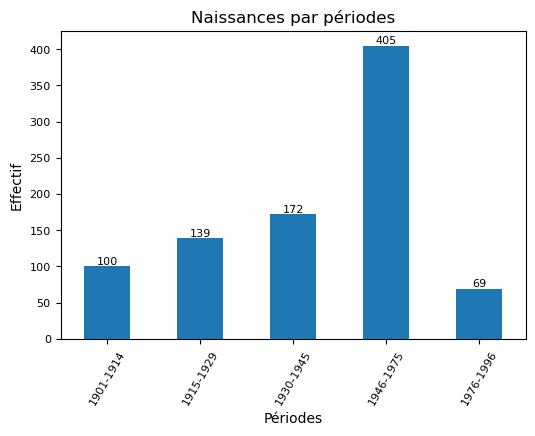

In [15]:
ax = cdf_p.groupby(by='periodes', observed=True).size()\
      .plot(kind='bar',rot=60, fontsize=8, figsize=(6,4))

ax.bar_label(ax.containers[0], fontsize=8)

plt.ylabel('Effectif')
plt.xlabel('Périodes')
plt.title('Naissances par périodes')
plt.show()

### Distributions des genres par périodes

In [16]:
### Tableau de contingence
X = "periodes"  # "0"
Y = "orientation_code"

ddf = cdf_p[[Y,X]].pivot_table(index=Y,columns=X,aggfunc=len,margins=True,margins_name="Total").fillna(0).astype(int)
ddf

C:\Users\LZender\AppData\Local\Temp\ipykernel_19312\4089954143.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  ddf = cdf_p[[Y,X]].pivot_table(index=Y,columns=X,aggfunc=len,margins=True,margins_name="Total").fillna(0).astype(int)


periodes,1901-1914,1915-1929,1930-1945,1946-1975,1976-1996,Total
orientation_code,,,,,,
centre,43,72,84,114,6,319
droite_conservatrice,1,3,4,10,1,19
droite_liberale,7,5,7,51,12,82
ecologiste,0,1,7,44,12,64
extreme_droite,11,16,28,85,18,158
extreme_gauche,1,3,0,4,0,8
gauche,28,31,34,96,20,209
independant,9,8,8,1,0,26
Total,100,139,172,405,69,885


In [17]:
### Production du tableau à analyser
D = ddf.iloc[:-1,:-1].copy(deep=True)
D

periodes,1901-1914,1915-1929,1930-1945,1946-1975,1976-1996
orientation_code,,,,,
centre,43,72,84,114,6
droite_conservatrice,1,3,4,10,1
droite_liberale,7,5,7,51,12
ecologiste,0,1,7,44,12
extreme_droite,11,16,28,85,18
extreme_gauche,1,3,0,4,0
gauche,28,31,34,96,20
independant,9,8,8,1,0


In [18]:
## Nombre de modalités ligne
K = D.shape[0]
## Nombre de modalités colonnes
L = D.shape[1]
# Effectif total
n = np.sum(D.values)
# Nombre max. de facteur
Hmax = np.min([K-1,L-1])

print('Dimensions: (', K, ',', L, '), effectif:', n, ', nombre max. facteurs:', Hmax)

Dimensions: ( 8 , 5 ), effectif: 885 , nombre max. facteurs: 4


In [19]:
### Valeurs produites par la fonction de la librairie 'stats'
statistic, p, dof, expected = stats.chi2_contingency(D)

print('Chi2 :', statistic, ', dof :',dof)
print('p-value :', p)


print('phi2 = inertie (variance totale) :', statistic/n)


### Tableau à l'indépendance
dfe = round(pd.DataFrame(expected),4)

### Coéfficient de Cramer
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.contingency.association.html

vc = stats.contingency.association(D, method='cramer')
print('Cramer: ', vc)

Chi2 : 144.49782803110014 , dof : 28
p-value : 1.1962710864964069e-17
phi2 = inertie (variance totale) : 0.16327438195604535
Cramer:  0.20203612421795103


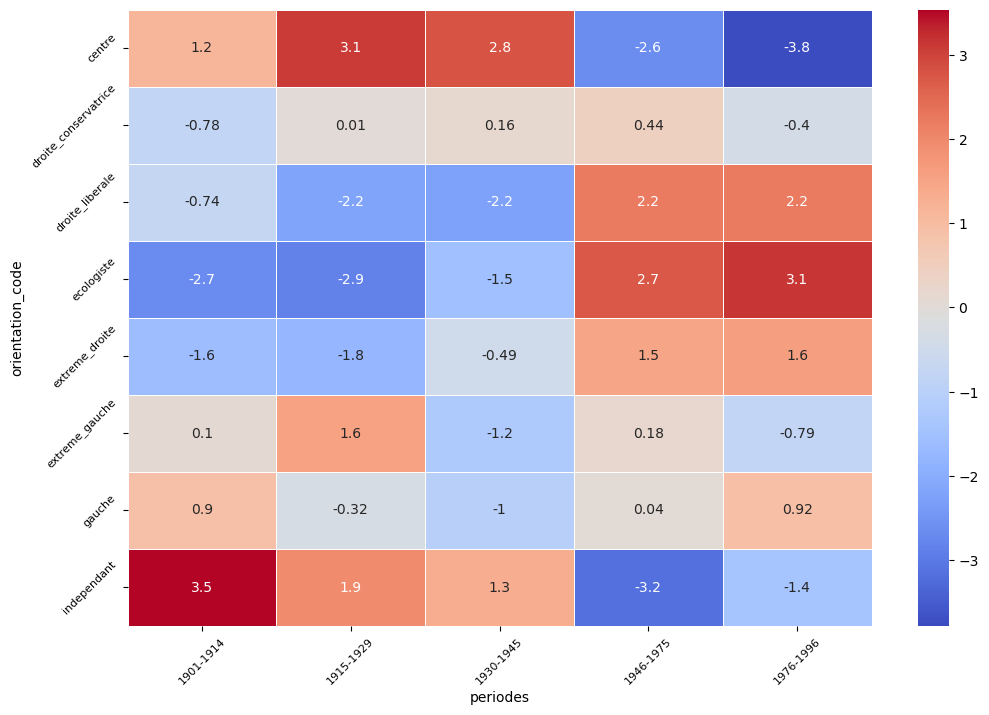

In [20]:
### Résidus pondérés (avec le signe)
### Doc. :
#   Rakotomalala, p.240
residus_ponderes = (round((D.values-dfe)/np.sqrt(dfe),2))
residus_ponderes.columns= D.columns
residus_ponderes.index=D.index


fig, ax = plt.subplots(figsize=(12,8))         
# Sample figsize in inches
g = sns.heatmap(residus_ponderes, annot=residus_ponderes, cmap="coolwarm", linewidths=.5, ax=ax)
labelsx = residus_ponderes.columns
labelsy = residus_ponderes.index
xt = g.set_xticklabels(labelsx, rotation=45, fontsize=8)
yt = g.set_yticklabels(labelsy, rotation=45, fontsize=8)

# Doc.: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html
plt.savefig('images/orientations_par_périodes_.jpg', bbox_inches='tight',
                       pad_inches=0.2)
plt.show()


#### Commentaire

Comme la variable 'gender' a deux modalités un seul facteur résumé la variance et une analyse factorielle n'est pas utile.

### Distributions des partis suivant la langue

In [21]:
### Tableau de contingence
X = "orientation_code"
Y = "langue"

ddf = cdf_p[[Y,X]].pivot_table(index=Y,columns=X,aggfunc=len,margins=True,margins_name="Total").fillna(0).astype(int)
ddf

orientation_code,centre,droite_conservatrice,droite_liberale,ecologiste,extreme_droite,extreme_gauche,gauche,independant,Total
langue,,,,,,,,,
ALL,215,18,39,40,124,0,134,25,595
FR,83,1,39,24,23,8,63,1,242
IT,21,0,4,0,11,0,12,0,48
Total,319,19,82,64,158,8,209,26,885


Si cette table de contingence concerne l'ensemble de la population, on utilise pour la suite la même population que pour l'analyse précédente, limitée donc dans le temps et sans le genre 'A'.

In [22]:
### Tableau de contingence
X = "orientation_code"
Y = "langue"

ddf = cdf_p[[Y,X]].pivot_table(index=Y,columns=X,aggfunc=len,margins=True,margins_name="Total").fillna(0).astype(int)
ddf

orientation_code,centre,droite_conservatrice,droite_liberale,ecologiste,extreme_droite,extreme_gauche,gauche,independant,Total
langue,,,,,,,,,
ALL,215,18,39,40,124,0,134,25,595
FR,83,1,39,24,23,8,63,1,242
IT,21,0,4,0,11,0,12,0,48
Total,319,19,82,64,158,8,209,26,885


In [23]:
### Production du tableau à analyser
D = ddf.iloc[:-1,:-1].copy(deep=True)
D

orientation_code,centre,droite_conservatrice,droite_liberale,ecologiste,extreme_droite,extreme_gauche,gauche,independant
langue,,,,,,,,
ALL,215,18,39,40,124,0,134,25
FR,83,1,39,24,23,8,63,1
IT,21,0,4,0,11,0,12,0


In [24]:
## Nombre de modalités ligne
K = D.shape[0]
## Nombre de modalités colonnes
L = D.shape[1]
# Effectif total
n = np.sum(D.values)
# Nombre max. de facteur
Hmax = np.min([K-1,L-1])

print('Dimensions: (', K, ',', L, '), effectif:', n, ', nombre max. facteurs:', Hmax)

Dimensions: ( 3 , 8 ), effectif: 885 , nombre max. facteurs: 2


In [25]:
### Valeurs produites par la fonction de la librairie 'stats'
statistic, p, dof, expected = stats.chi2_contingency(D)

print('Chi2 :', statistic, ', dof :',dof)
print('p-value :', p)


print('phi2 = inertie (variance totale) :', statistic/n)


### Tableau à l'indépendance
dfe = round(pd.DataFrame(expected),4)

### Coéfficient de Cramer
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.contingency.association.html

vc = stats.contingency.association(D, method='cramer')
print('Cramer: ', vc)

Chi2 : 75.87493307447619 , dof : 14
p-value : 1.634687470234475e-10
phi2 = inertie (variance totale) : 0.08573438765477535
Cramer:  0.2070439417790042


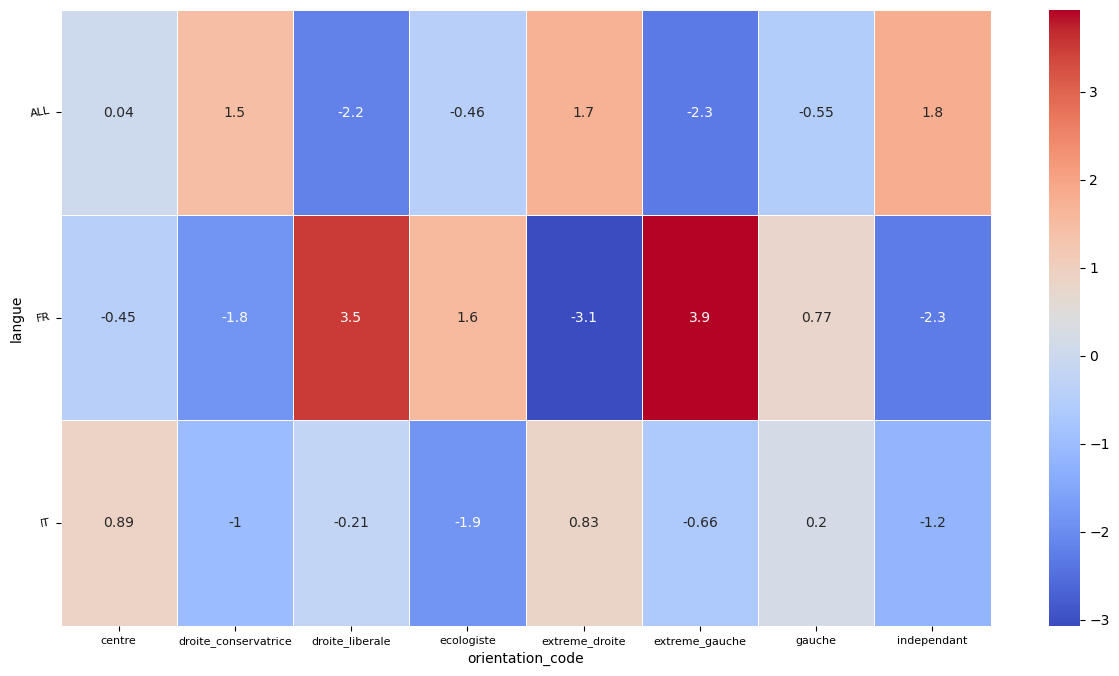

In [26]:
### Résidus pondérés (avec le signe)
### Doc. :
#   Rakotomalala, p.240
residus_ponderes = (round((D.values-dfe)/np.sqrt(dfe),2))
residus_ponderes.columns= D.columns
residus_ponderes.index=D.index


fig, ax = plt.subplots(figsize=(15,8))         
# Sample figsize in inches
g = sns.heatmap(residus_ponderes, annot=residus_ponderes, 
                cmap="coolwarm", linewidths=.5, ax=ax)
labelsx = residus_ponderes.columns
labelsy = residus_ponderes.index
xt = g.set_xticklabels(labelsx, rotation=0, fontsize=8)
yt = g.set_yticklabels(labelsy, rotation=10, fontsize=8)


# Doc.: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html
plt.savefig('images/langues_par_parti.jpg', bbox_inches='tight',
                       pad_inches=0.2)
plt.show()


## Analyser le lien entre parti+période et la langue

Cette analyse plus fine permet de comparer trois variable mais dans une logique bivariée

In [27]:
cdf_p.periodes = cdf_p.periodes.astype("str")
cdf_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885 entries, 0 to 884
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   uri               885 non-null    object
 1   nom               885 non-null    object
 2   genre             885 non-null    object
 3   parti             885 non-null    object
 4   parti_uri         885 non-null    object
 5   annee_nais        885 non-null    int32 
 6   langue            885 non-null    object
 7   orientation_code  885 non-null    object
 8   periodes          885 non-null    object
dtypes: int32(1), object(8)
memory usage: 58.9+ KB


In [28]:
cdf_p['langue_periodes'] = cdf_p.apply(lambda x: \
                    x.periodes + '_' + x.langue, axis=1)
cdf_p.head()

,uri,nom,genre,parti,parti_uri,annee_nais,langue,orientation_code,periodes,langue_periodes
0,http://www.wikidata.org/entity/Q1029622,Regula Rytz,F,Verts,http://www.wikidata.org/entity/Q659739,1962,ALL,ecologiste,1946-1975,1946-1975_ALL
1,http://www.wikidata.org/entity/Q1039793,Carl Miville-Seiler,M,PS,http://www.wikidata.org/entity/Q303745,1921,ALL,gauche,1915-1929,1915-1929_ALL
2,http://www.wikidata.org/entity/Q105607582,Fabienne Bugnon,F,Verts,http://www.wikidata.org/entity/Q659739,1959,FR,ecologiste,1946-1975,1946-1975_FR
3,http://www.wikidata.org/entity/Q105750072,Madeleine Bernasconi,F,PRD,http://www.wikidata.org/entity/Q659461,1939,FR,centre,1930-1945,1930-1945_FR
4,http://www.wikidata.org/entity/Q106371824,Otto G. Loretan,M,PRD,http://www.wikidata.org/entity/Q659461,1946,ALL,centre,1946-1975,1946-1975_ALL


In [29]:
cdf_p.groupby(by='langue_periodes').size()


langue_periodes
1901-1914_ALL     72
1901-1914_FR      24
1901-1914_IT       4
1915-1929_ALL    103
1915-1929_FR      33
1915-1929_IT       3
1930-1945_ALL    109
1930-1945_FR      53
1930-1945_IT      10
1946-1975_ALL    271
1946-1975_FR     110
1946-1975_IT      24
1976-1996_ALL     40
1976-1996_FR      22
1976-1996_IT       7
dtype: int64

In [30]:
### Tableau de contingence
X = "langue_periodes"
Y = "orientation_code"

ddf = cdf_p[[Y,X]].pivot_table(index=Y,columns=X,aggfunc=len,margins=True,margins_name="Total").fillna(0).astype(int)
ddf

langue_periodes,1901-1914_ALL,1901-1914_FR,1901-1914_IT,1915-1929_ALL,1915-1929_FR,1915-1929_IT,1930-1945_ALL,1930-1945_FR,1930-1945_IT,1946-1975_ALL,1946-1975_FR,1946-1975_IT,1976-1996_ALL,1976-1996_FR,1976-1996_IT,Total
orientation_code,,,,,,,,,,,,,,,,
centre,29,10,4,51,18,3,55,25,4,78,27,9,2,3,1,319
droite_conservatrice,1,0,0,3,0,0,3,1,0,10,0,0,1,0,0,19
droite_liberale,0,7,0,2,3,0,0,7,0,28,20,3,9,2,1,82
ecologiste,0,0,0,1,0,0,4,3,0,28,16,0,7,5,0,64
extreme_droite,11,0,0,14,2,0,22,3,3,63,16,6,14,2,2,158
extreme_gauche,0,1,0,0,3,0,0,0,0,0,4,0,0,0,0,8
gauche,22,6,0,25,6,0,17,14,3,63,27,6,7,10,3,209
independant,9,0,0,7,1,0,8,0,0,1,0,0,0,0,0,26
Total,72,24,4,103,33,3,109,53,10,271,110,24,40,22,7,885


In [31]:
### Liste construite manuellement à partir de cette liste
# print(ddf.index.to_list())

li = ['centre', 'droite_conservatrice', 'droite_liberale', 'ecologiste', 'extreme_droite', 'extreme_gauche', 'gauche', 'independant']

In [32]:
lc = ddf.columns.to_list()[:-1]

In [33]:
D = ddf.loc[li,lc].copy(deep=True)
D

langue_periodes,1901-1914_ALL,1901-1914_FR,1901-1914_IT,1915-1929_ALL,1915-1929_FR,1915-1929_IT,1930-1945_ALL,1930-1945_FR,1930-1945_IT,1946-1975_ALL,1946-1975_FR,1946-1975_IT,1976-1996_ALL,1976-1996_FR,1976-1996_IT
orientation_code,,,,,,,,,,,,,,,
centre,29,10,4,51,18,3,55,25,4,78,27,9,2,3,1
droite_conservatrice,1,0,0,3,0,0,3,1,0,10,0,0,1,0,0
droite_liberale,0,7,0,2,3,0,0,7,0,28,20,3,9,2,1
ecologiste,0,0,0,1,0,0,4,3,0,28,16,0,7,5,0
extreme_droite,11,0,0,14,2,0,22,3,3,63,16,6,14,2,2
extreme_gauche,0,1,0,0,3,0,0,0,0,0,4,0,0,0,0
gauche,22,6,0,25,6,0,17,14,3,63,27,6,7,10,3
independant,9,0,0,7,1,0,8,0,0,1,0,0,0,0,0


In [34]:
## Nombre de modalités ligne
K = D.shape[0]
## Nombre de modalités colonnes
L = D.shape[1]
# Effectif total
n = np.sum(D.values)
# Nombre max. de facteur
Hmax = np.min([K-1,L-1])

print('Dimensions: (', K, ',', L, '), effectif:', n, ', nombre max. facteurs:', Hmax)

Dimensions: ( 8 , 15 ), effectif: 885 , nombre max. facteurs: 7


In [35]:
### Valeurs produites par la fonction de la librairie 'stats'
statistic, p, dof, expected = stats.chi2_contingency(D)

print('Chi2 :', statistic, ', dof :',dof)
print('p-value :', p)


print('phi2 = inertie (variance totale) :', statistic/n)


### Tableau à l'indépendance
dfe = round(pd.DataFrame(expected),4)

### Coéfficient de Cramer
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.contingency.association.html

vc = stats.contingency.association(D, method='cramer')
print('Cramer: ', vc)

Chi2 : 289.4585514645047 , dof : 98
p-value : 8.521444318863607e-21
phi2 = inertie (variance totale) : 0.32707180956441206
Cramer:  0.21615860895066713


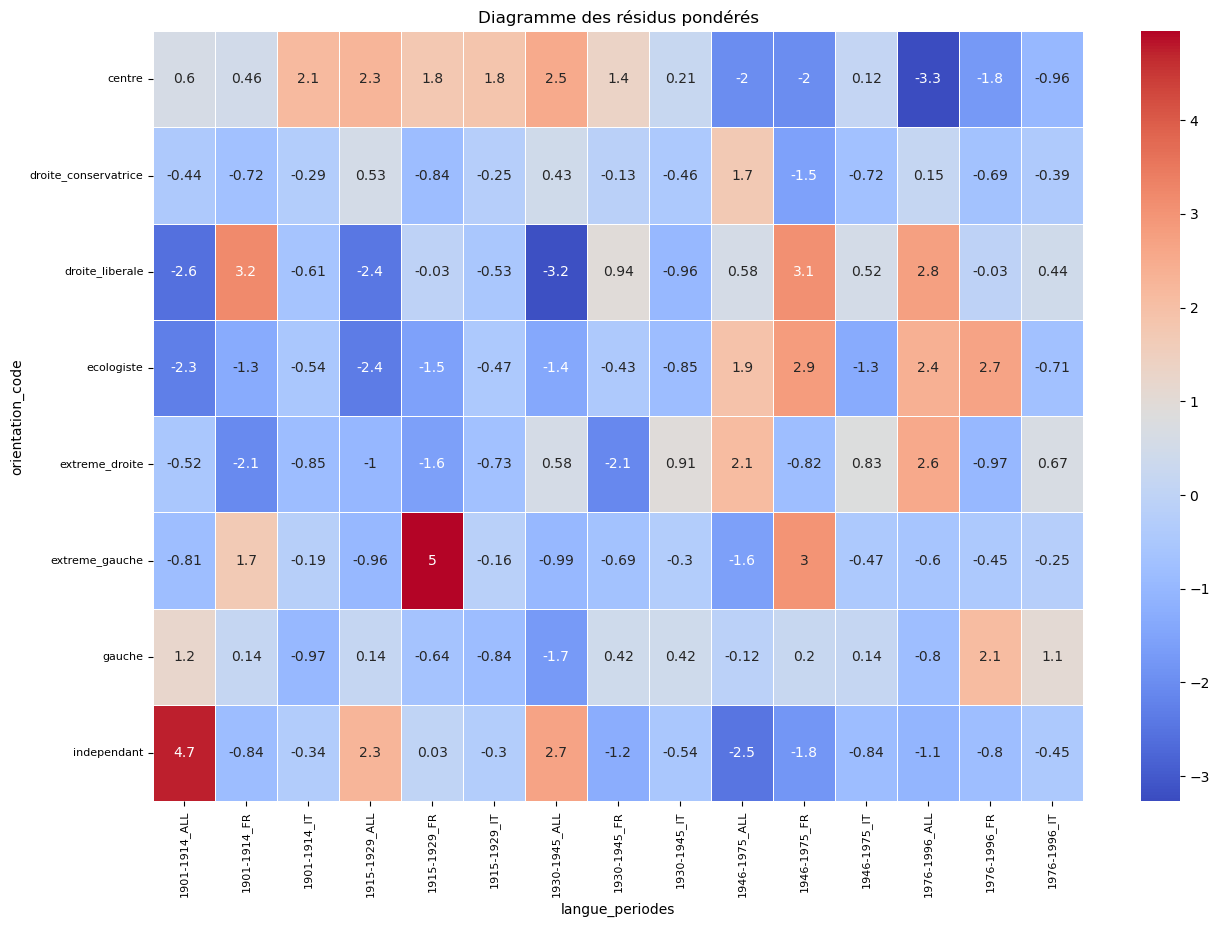

In [36]:
### Résidus pondérés (avec le signe)
### Doc. :
#   Rakotomalala, p.240
residus_ponderes = (round((D.values-dfe)/np.sqrt(dfe),2))
residus_ponderes.columns= D.columns
residus_ponderes.index=D.index


fig, ax = plt.subplots(figsize=(15,10))         
# Sample figsize in inches
g = sns.heatmap(residus_ponderes, annot=residus_ponderes, 
                cmap="coolwarm", linewidths=.5, ax=ax)
labelsx = residus_ponderes.columns
labelsy = residus_ponderes.index
xt = g.set_xticklabels(labelsx, rotation=90, fontsize=8)
yt = g.set_yticklabels(labelsy, rotation=0, fontsize=8)


g.set_title('Diagramme des résidus pondérés')

plt.savefig('images/parti_période_langues_resid_ponderes.jpg', bbox_inches='tight')
plt.show()


In [37]:
afc = CA(row_labels=D.index,col_labels=D.columns)
afc.fit(D.values)

CA(col_labels=Index(['1901-1914_ALL', '1901-1914_FR', '1901-1914_IT', '1915-1929_ALL',
       '1915-1929_FR', '1915-1929_IT', '1930-1945_ALL', '1930-1945_FR',
       '1930-1945_IT', '1946-1975_ALL', '1946-1975_FR', '1946-1975_IT',
       '1976-1996_ALL', '1976-1996_FR', '1976-1996_IT'],
      dtype='object', name='langue_periodes'),
   row_labels=Index(['centre', 'droite_conservatrice', 'droite_liberale', 'ecologiste',
       'extreme_droite', 'extreme_gauche', 'gauche', 'independant'],
      dtype='object', name='orientation_code'))

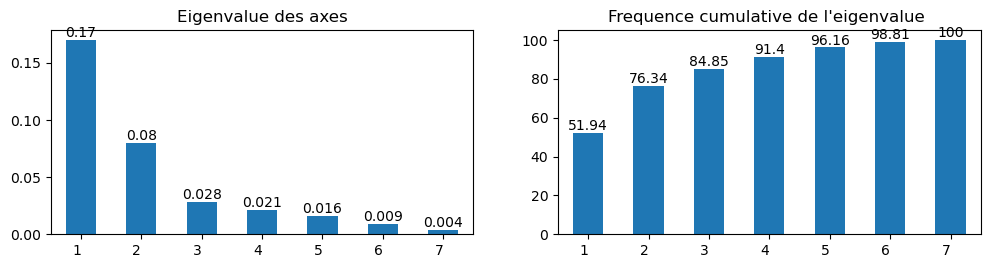

In [38]:
eig = pd.DataFrame(afc.eig_)

r1 = round(eig.iloc[0], 3)
r2 = round(eig.iloc[2], 2)
s=list(range(1,len(r1)+1))
r1.index=s
r2.index=s

# https://www.statology.org/pandas-subplots/
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,3))

ax1 = r1.plot(kind='bar', ax=axes[0], title='Eigenvalue des axes')
ax2 = r2.plot(kind='bar', ax=axes[1], title="Frequence cumulative de l'eigenvalue ")


ax1.bar_label(ax1.containers[0])
ax2.bar_label(ax2.containers[0])


# Met les valeurs xticks en vertical
fig.autofmt_xdate(rotation=0)
plt.show()

### Graphiques et interprétation du premier plan factoriel

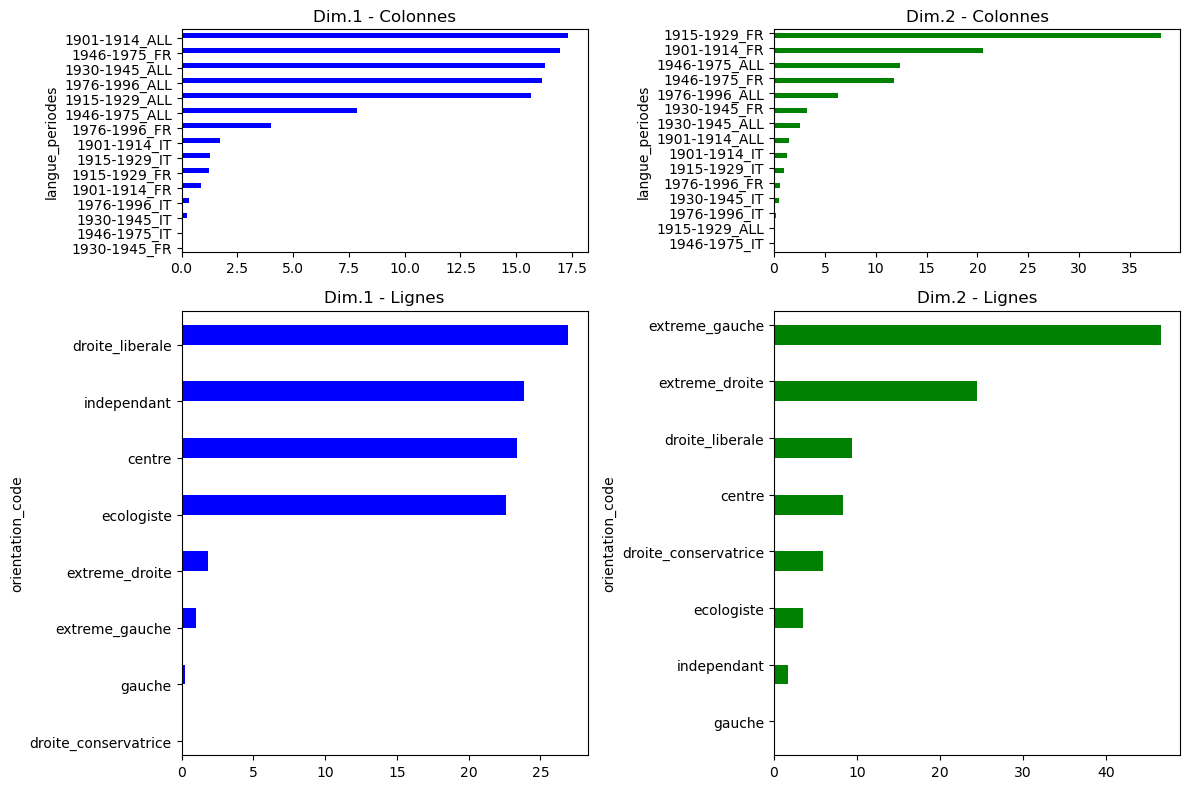

In [39]:
import matplotlib.pyplot as plt

# Informations sur les contributions des colonnes
df_col = afc.col_topandas()[['col_contrib_dim1', 'col_contrib_dim2']]

r1_col = df_col.iloc[:,0]
r2_col = df_col.iloc[:,1]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8),
                         gridspec_kw={'height_ratios': [1, 2]})

# Ajustement de l'espacement entre les barres
bar_width = 0.35
index = np.arange(len(r1_col))

r1_col.sort_values().plot(kind='barh', ax=axes[0,0], title='Dim.1 - Colonnes', width=bar_width, color='b', position=0)
r2_col.sort_values().plot(kind='barh', ax=axes[0,1], title='Dim.2 - Colonnes', width=bar_width, color='g', position=1)

# Informations sur les contributions des lignes
df_row = afc.row_topandas()[['row_contrib_dim1', 'row_contrib_dim2']]

r1_row = df_row.iloc[:,0]
r2_row = df_row.iloc[:,1]

r1_row.sort_values().plot(kind='barh', ax=axes[1,0], title='Dim.1 - Lignes', width=bar_width, color='b', position=0)
r2_row.sort_values().plot(kind='barh', ax=axes[1,1], title='Dim.2 - Lignes', width=bar_width, color='g', position=1)

# Ajustement de l'espacement vertical entre les sous-graphiques
plt.subplots_adjust(hspace=1)  # Ajustez la valeur selon vos préférences

plt.tight_layout()
plt.show()


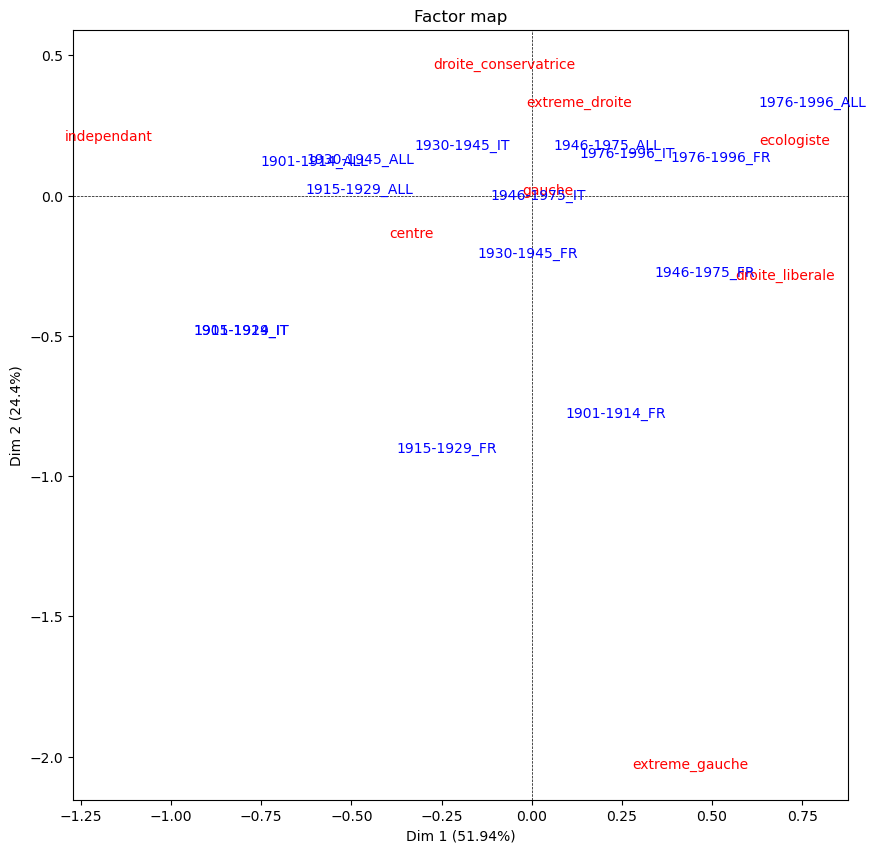

In [40]:
# Représentation simultanée, avec amplification
afc.mapping(num_x_axis=1,num_y_axis=2,figsize=(10,10))

### Représenter l'autre plan factoriel

## commentaire

j'ai un problème pour représenter l'autre plan factoriel car je n'ai que 2 dimensions, dû au nombre max. de facteurs

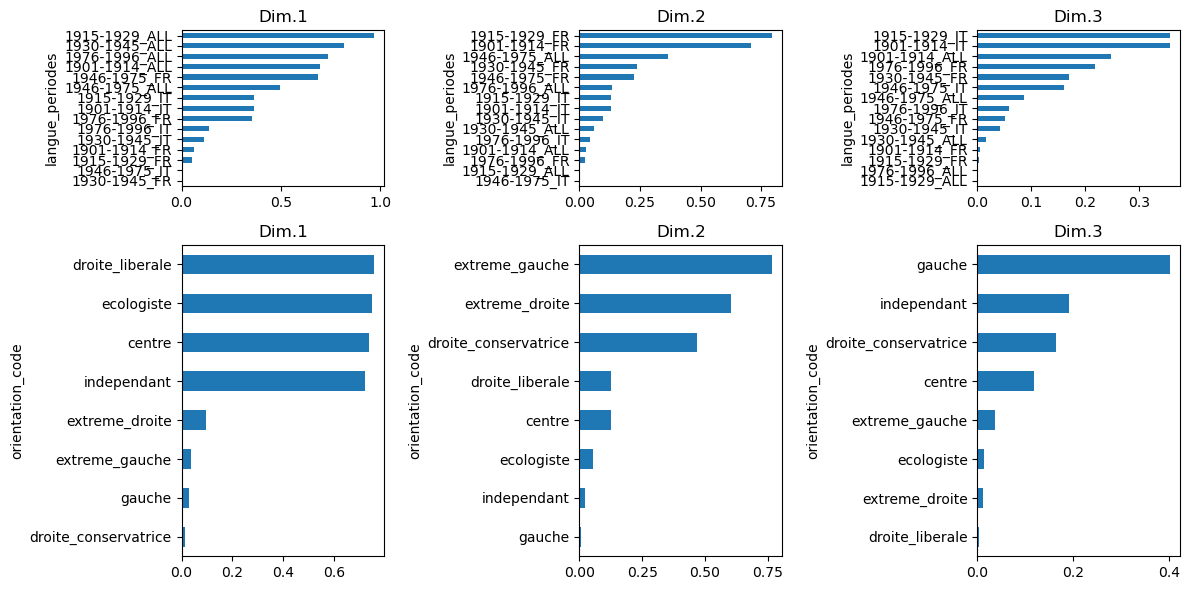

In [41]:
### Informations sur les cosinus carrés. Ces valeurs expriment 
# la qualité de représentation d'une modalité sur l'axe correspondant

### Colonnes
df = afc.col_topandas()[['col_cos2_dim1',
                         'col_cos2_dim2',
                         'col_cos2_dim3']]

r1 = df.iloc[:,0]
r2 = df.iloc[:,1]
r3 = df.iloc[:,2]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,6), 
                         gridspec_kw={'height_ratios': [1, 2]})

r1.sort_values().plot(kind='barh', ax=axes[0,0], title='Dim.1')
r2.sort_values().plot(kind='barh', ax=axes[0,1], title='Dim.2')
r3.sort_values().plot(kind='barh', ax=axes[0,2], title='Dim.3')

### Lignes
df = afc.row_topandas()[['row_cos2_dim1',
                         'row_cos2_dim2',
                         'row_cos2_dim3']]
r1 = df.iloc[:,0]
r2 = df.iloc[:,1]
r3 = df.iloc[:,2]

r1.sort_values().plot(kind='barh', ax=axes[1,0], title='Dim.1')
r2.sort_values().plot(kind='barh', ax=axes[1,1], title='Dim.2')
r3.sort_values().plot(kind='barh', ax=axes[1,2], title='Dim.3')

plt.tight_layout()
plt.show()

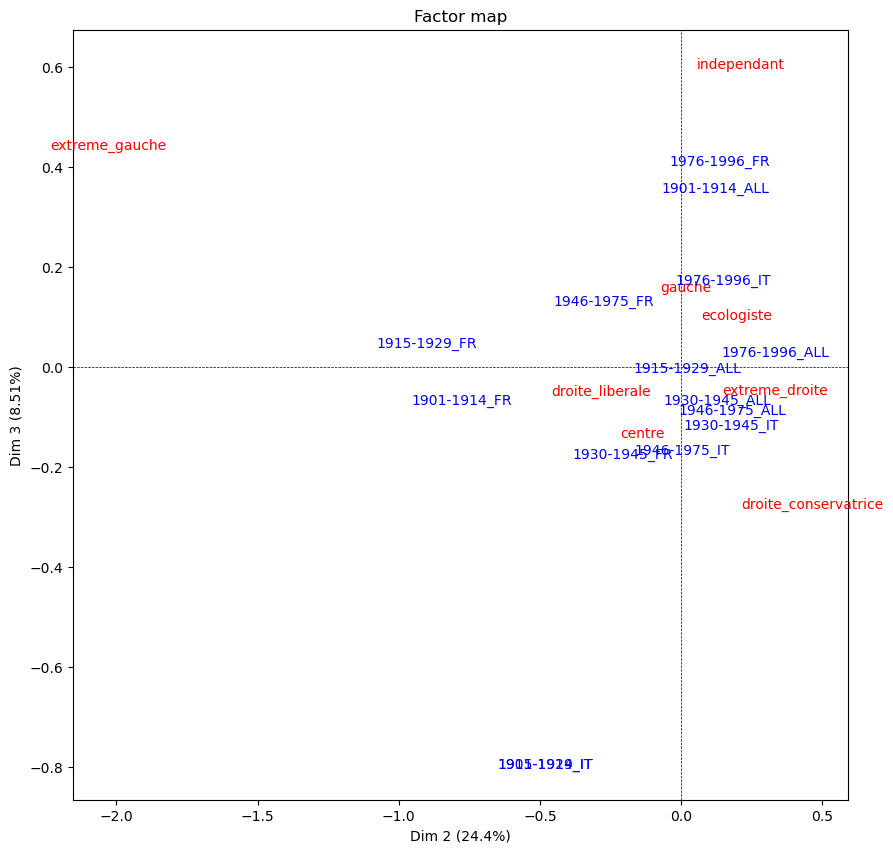

In [42]:
# Représentation simultanée, avec amplification
afc.mapping(num_x_axis=2,num_y_axis=3,figsize=(10,10))